In [1]:
# p.322 13.9 目の検出
import cv2
import IPython.display

def show_image(image):
    _, png = cv2.imencode('.png', image)
    i = IPython.display.Image(data=png)
    IPython.display.clear_output(wait=True)
    IPython.display.display(i)
    
def get_frame(cap, scalling_factor):
    r, frame = cap.read()
    if not r: return None
    frame = cv2.resize(frame, None,
                      fx=scalling_factor, fy=scalling_factor,
                      interpolation=cv2.INTER_AREA)
    return frame

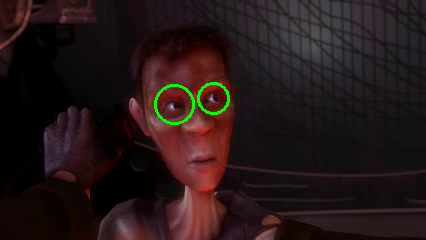

In [2]:
import numpy as np

face_cascade = cv2.CascadeClassifier('haar_cascade_files/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haar_cascade_files/haarcascade_eye.xml')

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
    
if eye_cascade.empty():
    raise IOError('Unable to load the eye cascade classifier xml file')
    
cap = cv2.VideoCapture('ed.mp4')
scaling_factor = 1

try:
    while True:
        frame = get_frame(cap, scaling_factor)
        if frame is None: break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        face_rects = face_cascade.detectMultiScale(gray, 1.1, 3)

        for x, y, w, h in face_rects:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray)
            
            for xe, ye, we, he in eyes:
                center = (int(xe + we/2), int(ye + he/2))
                radius = int(0.3 * (we + he))
                color = (0, 255, 0)
                thickness = 2
                cv2.circle(roi_color, center, radius, color, thickness)

            show_image(frame)
            import time
            time.sleep(0.03)
            
except KeyboardInterrupt:
    print('Interrupted')
    
cap.release()